# CO Poission GLM

Below are the different GLM methods possible. Initially we take Xell's code and clean it a little.

First all package imports have been collated for ease.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split

Next we simply import our data and get it into the format required. We are firslty looking to tackle the 31-day data to start off with.

In [3]:
#Read the data into the file.
fullData = pd.read_csv("31DayData.csv")

#Create a dataframe from the relevant columns.
df = fullData[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]

#Remove the 'all cancer types' rows from the dataframe.
df = df[df['CancerType'] != 'All Cancer Types']

The following may be of use when looking at the correlation between the two sets of numerical values which we have here. We can also identify all the data types within our frame.

In [5]:
#Correlation of the Eligible Referrals with the Eligible Referalls Treated.
rho = df.corr()
#print(rho)

#View of the whole data frame.
types = df.dtypes
#print(types)

Next we take an overview of the different cancers within the data we have in our set. We firstly achieve four different graphs which are explained below the output, before also looking at the boxplot in the situation.

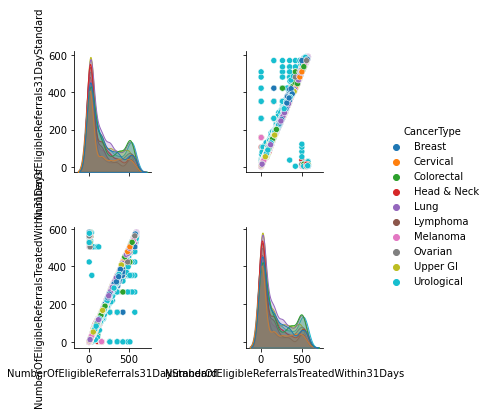

In [13]:
sns.pairplot(df, hue='CancerType', height=2.5, aspect=1)

<AxesSubplot:xlabel='CancerType', ylabel='NumberOfEligibleReferrals31DayStandard'>

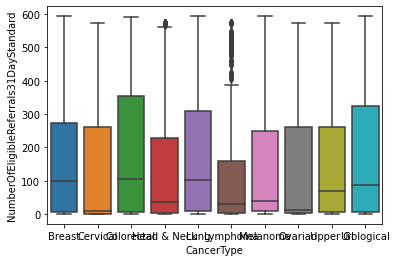

In [14]:
sns.boxplot(y='NumberOfEligibleReferrals31DayStandard', x='CancerType',data=df)

Next we look to form the variables in the correct way. This is the first part of building our GLM.

## 0. Correct form of data for a GLM

In [16]:
# choose explanatory variables - note we can also include 'CancerType' and 'Sex' here.
X = df[['Quarter','HB','CancerType']]

# turn our catergories into dummies.
X = pd.get_dummies(data=X, drop_first=True)
#X.head()

# choose which column is the targeted output data.
Y = df['NumberOfEligibleReferrals31DayStandard']
#Y.head()

## 1. SKLearn

Below we create our GLM model using the SKLearn method.

In [17]:
#Build the model using SKLearn.
prSKLearn = PoissonRegressor(alpha=0, fit_intercept=True)

#Fit the model using the build above.
prSKLearn.fit(X, Y)
prSKLearn.get_params()

#Should we want to see the values of each of the intercepts we can do so by uncommenting the below.
#print(prSKLearn.intercept_)

#I need to check what the below actually does...
coeff_parameter = pd.DataFrame(prSKLearn.coef_, X.columns,columns=['Coefficient'])

Next we use instead use our data in a split manner in order to try and see whether the GLM achieves a suitable outcome (from https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c).


In [19]:
#Split our data into test and train.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

#Use our training data to let the SKLearn model learn
prSKLearn.fit(X_train, y_train)

#Get predictions for the test data using the SKLearn model.
predictions = prSKLearn.predict(X_test)